In [165]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [166]:
# Read the CSV file into a DataFrame
df_Milk = pd.read_csv('Milk.csv')
df_Onion = pd.read_csv('Onion.csv')
df_Salt = pd.read_csv('Salt.csv')
df_Sugar = pd.read_csv('Sugar.csv')
df_Sunflower_oil = pd.read_csv('Sunflower_oil.csv')
df_tea = pd.read_csv('Tea.csv')
# df_Milk.head()
# df_Onion.head()
# df_Salt.head()
# df_Sugar.head()
# df_Sunflower_oil.head()


/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_8738/99923187.py:2: DtypeWarning: Columns (0,1,2,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Milk = pd.read_csv('Milk.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_8738/99923187.py:3: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Onion = pd.read_csv('Onion.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_8738/99923187.py:4: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Salt = pd.read_csv('Salt.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_8738/99923187.py:5: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Sugar = pd.read_csv('Sugar.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_8738/99923187.py:6: DtypeWarning: Columns (0,1,2,

In [167]:
dataOfCommodety = df_Salt

dataOfCommodety.tail(10)

,Date,Centre,Commodity,Price per Kg,Region
846662,NaN,NaN,NaN,NaN,NaN
846663,NaN,NaN,NaN,NaN,NaN
846664,NaN,NaN,NaN,NaN,NaN
846665,NaN,NaN,NaN,NaN,NaN
846666,NaN,NaN,NaN,NaN,NaN
846667,NaN,NaN,NaN,NaN,NaN
846668,NaN,NaN,NaN,NaN,NaN
846669,NaN,NaN,NaN,NaN,NaN
846670,NaN,NaN,NaN,NaN,NaN
846671,NaN,NaN,NaN,NaN,NaN


In [168]:
# print(dataOfCommodety.describe())

In [169]:
# Find the number of missing values in each column
missing_values = dataOfCommodety.isnull().sum()
print(missing_values)

Date            753221
Centre          753221
Commodity       753221
Price per Kg    753221
Region          753221
dtype: int64


In [170]:
[features for features in df_tea.columns if df_tea[features].isnull().sum()>0]

['Date', 'Centre', 'Commodity', 'Price per Kg', 'Region']

In [171]:
dataOfCommodety.dropna(how='any', inplace=True)
dataOfCommodety.tail(10)
missing_values = dataOfCommodety.isnull().sum()
print(missing_values)
data_frame = dataOfCommodety
# dataframe.head()

Date            0
Centre          0
Commodity       0
Price per Kg    0
Region          0
dtype: int64


There are several Regions in the retail data, we will start from time series analysis and forcasting foe the 'NORTH'

In [172]:
data_frame['Region'].value_counts()

NORTH         27075
SOUTH         19816
WEST          19702
EAST          14855
NORTH EAST    12003
Name: Region, dtype: int64

In [173]:
# NORTH Region
Region= data_frame.loc[data_frame['Region']=='NORTH EAST']
Region.head(5)

,Date,Centre,Commodity,Price per Kg,Region
10,1-Jan-03,SHILLONG,Salt Pack (Iodised),7.0,NORTH EAST
11,1-Jan-03,AIZWAL,Salt Pack (Iodised),8.0,NORTH EAST
12,1-Jan-03,AGARTALA,Salt Pack (Iodised),7.0,NORTH EAST
27,2-Jan-03,SHILLONG,Salt Pack (Iodised),7.0,NORTH EAST
28,2-Jan-03,AIZWAL,Salt Pack (Iodised),8.0,NORTH EAST


In [174]:
print('Starting date:',Region['Date'].min())
print('Ending date:',Region['Date'].max())



Starting date: 1-Apr-03
Ending date: 9-Sep-14


In [175]:
# Drop unrelevant variables:
cols = ['Centre','Commodity' ,'Region']
Region.drop(cols, axis=1, inplace= True)
Region

/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_8738/2924605642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Region.drop(cols, axis=1, inplace= True)


,Date,Price per Kg
10,1-Jan-03,7.0
11,1-Jan-03,8.0
12,1-Jan-03,7.0
27,2-Jan-03,7.0
28,2-Jan-03,8.0
...,...,...
93427,28-Apr-15,6.0
93428,28-Apr-15,17.0
93429,28-Apr-15,20.0
93430,28-Apr-15,11.0


In [176]:
### Check out missing values:
Region.isnull().sum()

Date            0
Price per Kg    0
dtype: int64

There are no missing values, so we move to the next step.
Aggregate sum of Region Price per Kg by date

In [177]:
Region= Region.groupby('Date')['Price per Kg'].mean().reset_index()
Region.head()

,Date,Price per Kg
0,1-Apr-03,7.333333
1,1-Apr-04,7.375000
2,1-Apr-05,7.500000
3,1-Apr-08,9.500000
4,1-Apr-09,8.400000


In [178]:
Region['Date'] = pd.to_datetime(data_frame['Date'])
Region= Region.set_index('Date')
Region

,Price per Kg
Date,
2003-01-01,7.333333
2003-01-01,7.375000
2003-01-01,7.500000
2003-01-01,9.500000
2003-01-01,8.400000
...,...
2003-09-19,9.400000
2003-09-19,10.750000
2003-09-19,11.250000


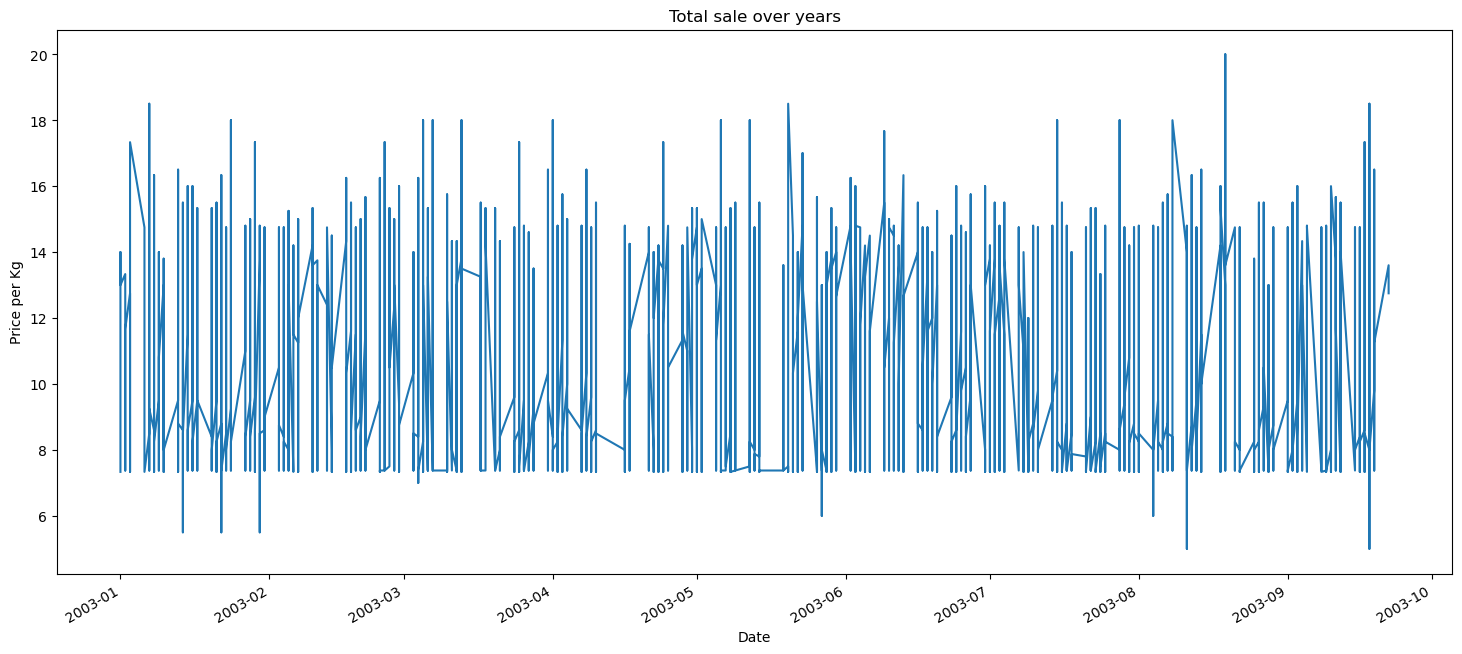

In [179]:
Region['Price per Kg'].plot()
plt.xlabel('Date')
plt.ylabel('Price per Kg')
plt.title('Total sale over years')
plt.show()

In [180]:
#create new DataFrame
monthly_Region = pd.DataFrame()
print(Region['Price per Kg'])
monthly_Region['Price per Kg'] = Region['Price per Kg'].resample('MS').mean()

Date
2003-01-01     7.333333
2003-01-01     7.375000
2003-01-01     7.500000
2003-01-01     9.500000
2003-01-01     8.400000
                ...    
2003-09-19     9.400000
2003-09-19    10.750000
2003-09-19    11.250000
2003-09-22    13.600000
2003-09-22    12.750000
Name: Price per Kg, Length: 3018, dtype: float64


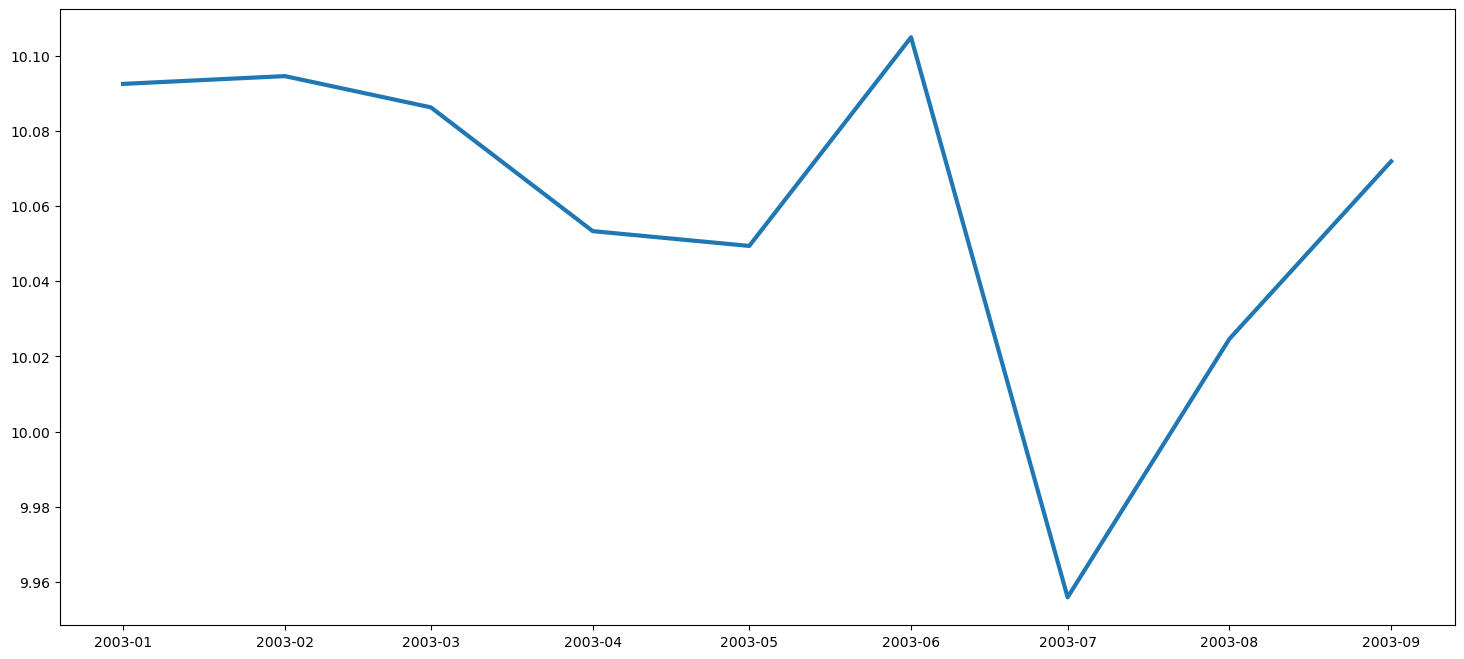

In [181]:
#plot weekly sales data
monthly_Region.values
plt.plot(monthly_Region.index,monthly_Region['Price per Kg'], linewidth=3)

In [182]:
Region['year'] = [d.year for d in Region.index]
Region['month'] = [d.strftime('%b') for d in Region.index]
years= Region['year'].unique()
years

array([2003])

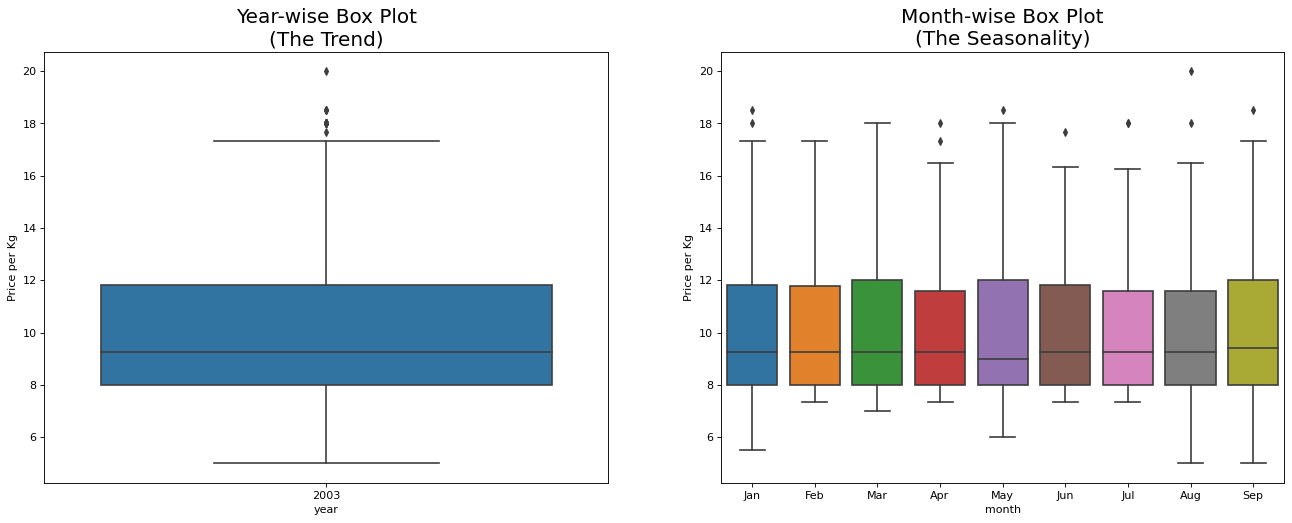

In [183]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price per Kg', data=Region, ax=axes[0])
sns.boxplot(x='month', y='Price per Kg', data=Region.loc[~Region.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

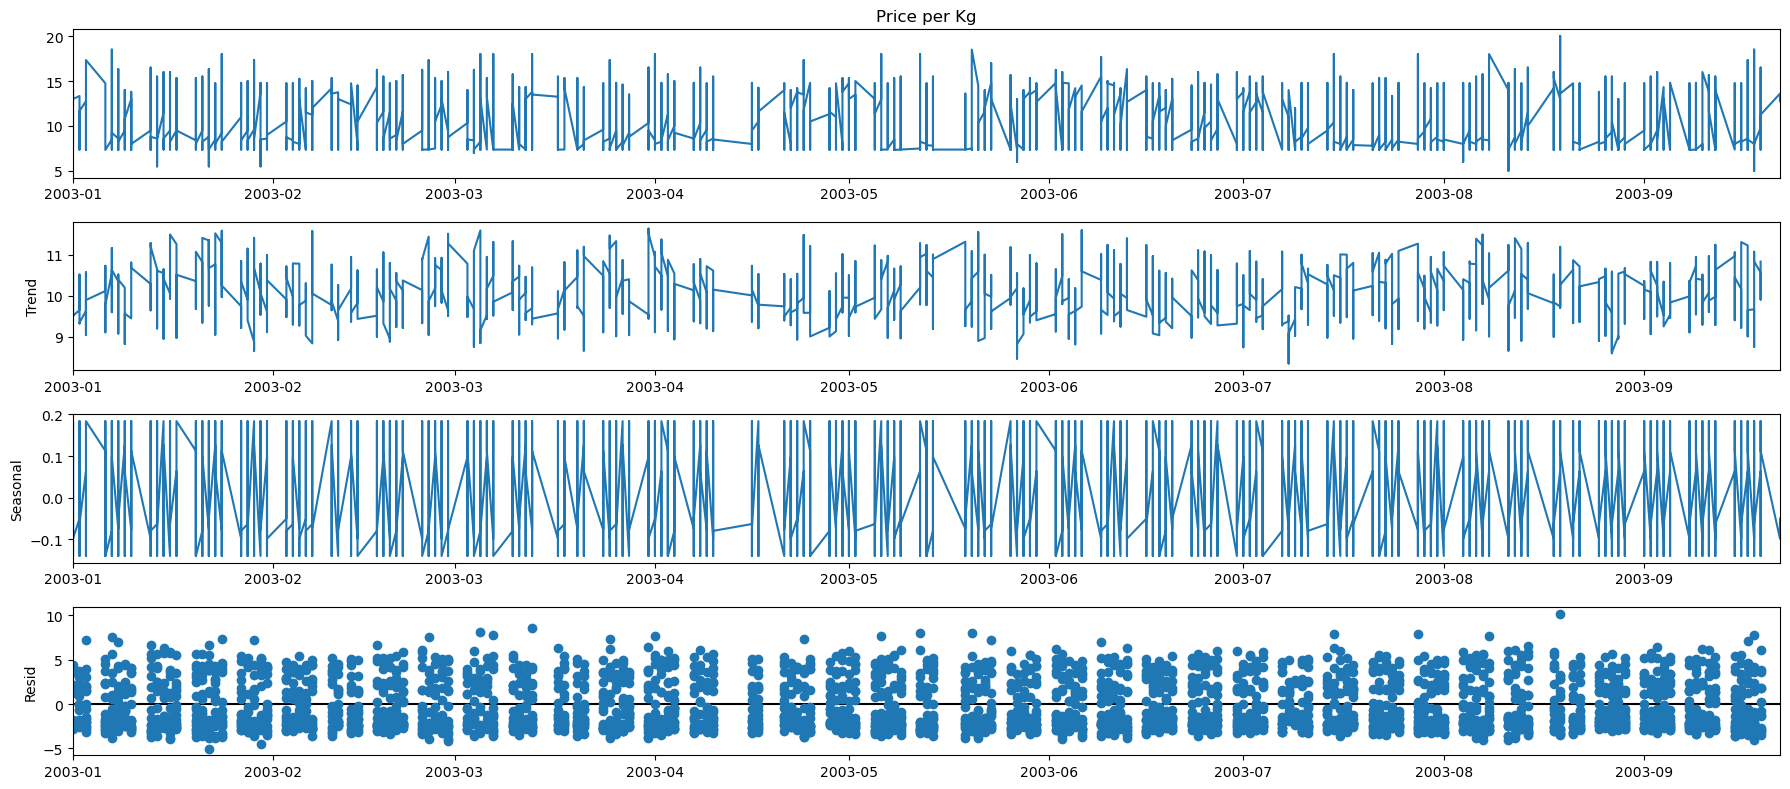

In [184]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(Region['Price per Kg'], model='additive', period=12)
fig = decomposition.plot()
plt.show()

Check Stationary of the Dataset 

In [185]:
#Determing rolling statistics
moving_avg = monthly_Region.rolling(12).mean()
moving_std= monthly_Region.rolling(12).std()


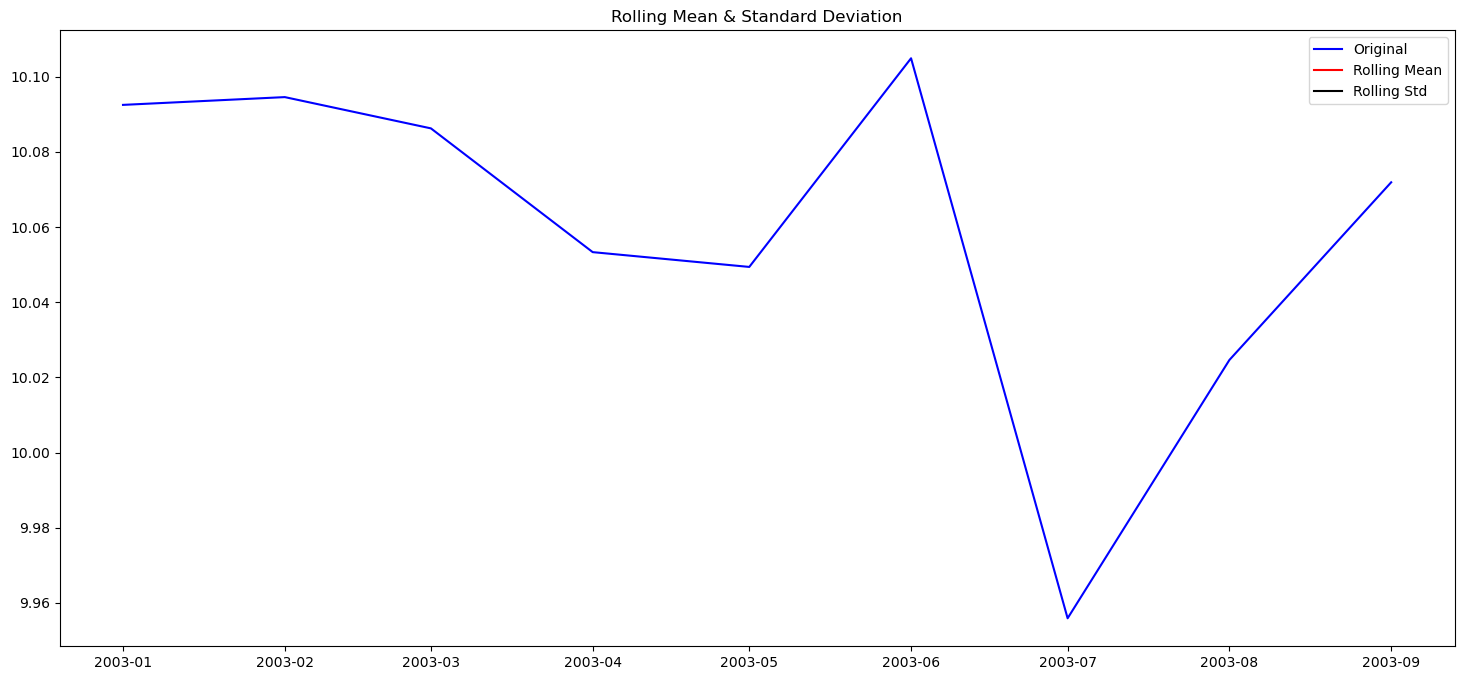

In [186]:
# Plot rolling statistics:
orig = plt.plot(monthly_Region, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [187]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_Region, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 0.617926
p-value                        0.988049
#Lags Used                     2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [188]:
#create new DataFrame:
# y = Region
Region
# store = Region.set_index('Date')
# store.index

,Price per Kg,year,month
Date,,,
2003-01-01,7.333333,2003,Jan
2003-01-01,7.375000,2003,Jan
2003-01-01,7.500000,2003,Jan
2003-01-01,9.500000,2003,Jan
2003-01-01,8.400000,2003,Jan
...,...,...,...
2003-09-19,9.400000,2003,Sep
2003-09-19,10.750000,2003,Sep
2003-09-19,11.250000,2003,Sep


In [189]:
## Lets take a log transform here for simplicity:
miss = data_frame.isnull().sum()
print(miss)
store1= data_frame
cols1= ['Centre', 'Commodity', 'Region']
store1.drop(cols1, axis=1, inplace=True)
store1
# plt.plot(ts_log)

Date            0
Centre          0
Commodity       0
Price per Kg    0
Region          0
dtype: int64


,Date,Price per Kg
0,1-Jan-03,6.5
1,1-Jan-03,7.5
2,1-Jan-03,7.0
3,1-Jan-03,6.0
4,1-Jan-03,6.0
...,...,...
93446,28-Apr-15,14.0
93447,28-Apr-15,14.0
93448,28-Apr-15,17.0
93449,28-Apr-15,16.0


In [190]:
store1 = store1.groupby('Date')['Price per Kg'].sum().reset_index()
store1

,Date,Price per Kg
0,1-Apr-03,111.5
1,1-Apr-04,119.0
2,1-Apr-05,119.0
3,1-Apr-08,224.0
4,1-Apr-09,253.0
...,...,...
3033,9-Sep-09,283.0
3034,9-Sep-10,436.0
3035,9-Sep-11,490.0
3036,9-Sep-13,403.0


In [191]:
store1 = store1.set_index('Date')
store1.index

Index(['1-Apr-03', '1-Apr-04', '1-Apr-05', '1-Apr-08', '1-Apr-09', '1-Apr-10',
       '1-Apr-11', '1-Apr-13', '1-Apr-14', '1-Apr-15',
       ...
       '9-Oct-14', '9-Sep-03', '9-Sep-04', '9-Sep-05', '9-Sep-08', '9-Sep-09',
       '9-Sep-10', '9-Sep-11', '9-Sep-13', '9-Sep-14'],
      dtype='object', name='Date', length=3038)

In [192]:
#create new DataFrame:
store1.index = pd.to_datetime(store1.index)

y = store1['Price per Kg'].resample('MS').mean()

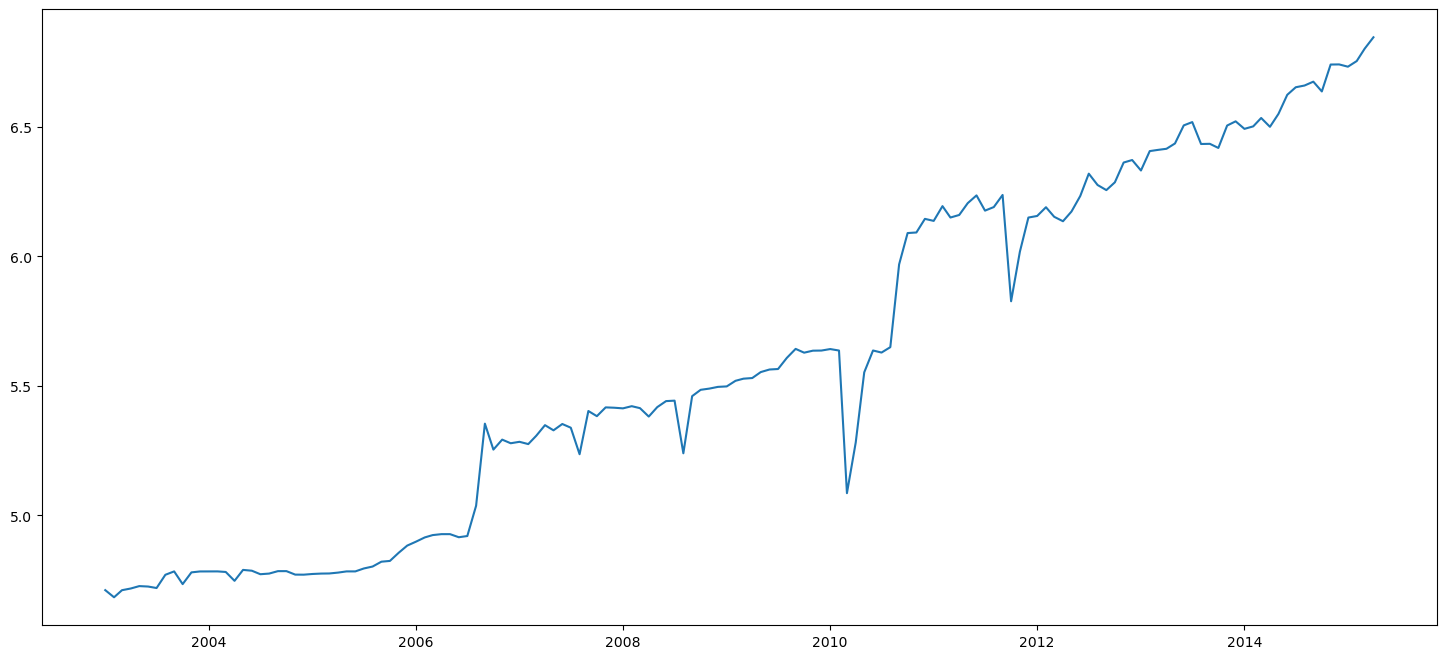

In [193]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

Moving Average

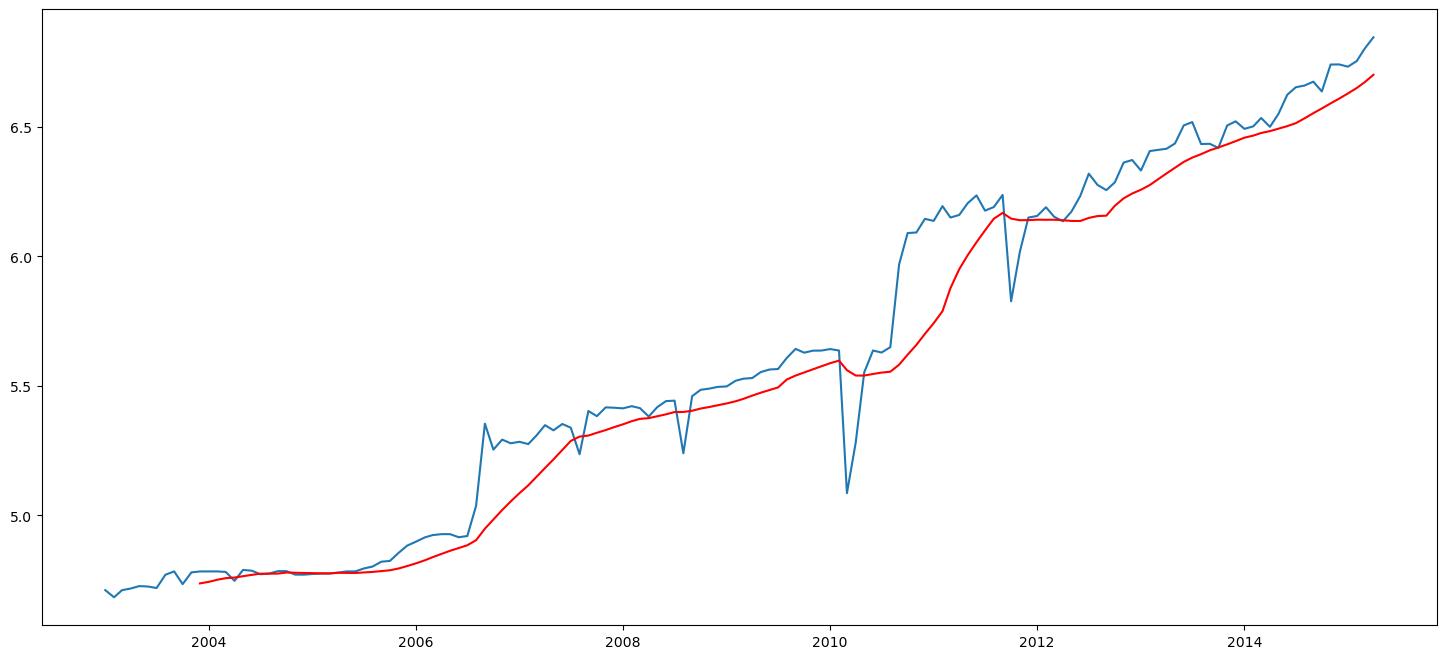

In [194]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean.

Lets subtract this from the original series.

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [195]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
2003-06-01         NaN
2003-07-01         NaN
2003-08-01         NaN
2003-09-01         NaN
2003-10-01         NaN
2003-11-01         NaN
2003-12-01    0.046192
Freq: MS, Name: Price per Kg, dtype: float64

In [196]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

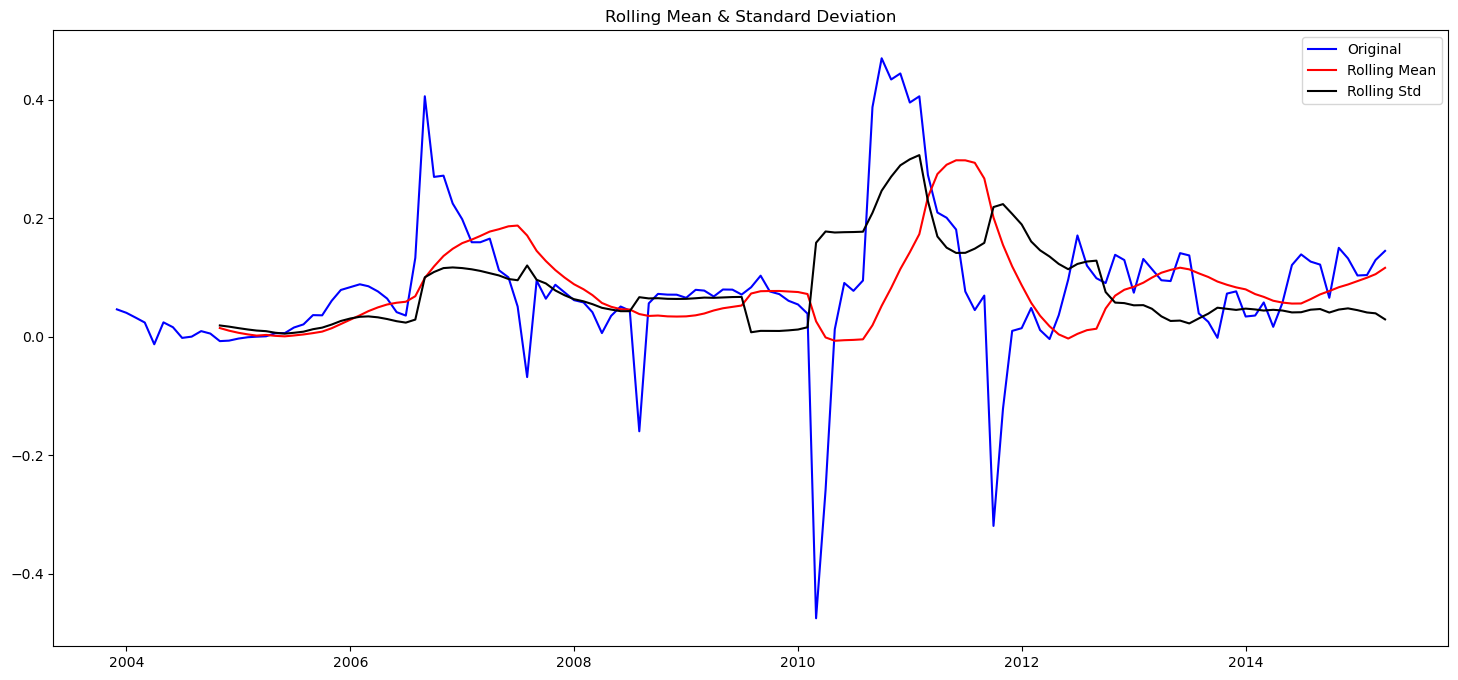

Results of Dickey-Fuller Test:
Test Statistic                  -4.684797
p-value                          0.000090
#Lags Used                       5.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [197]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Exponentially weighted moving average

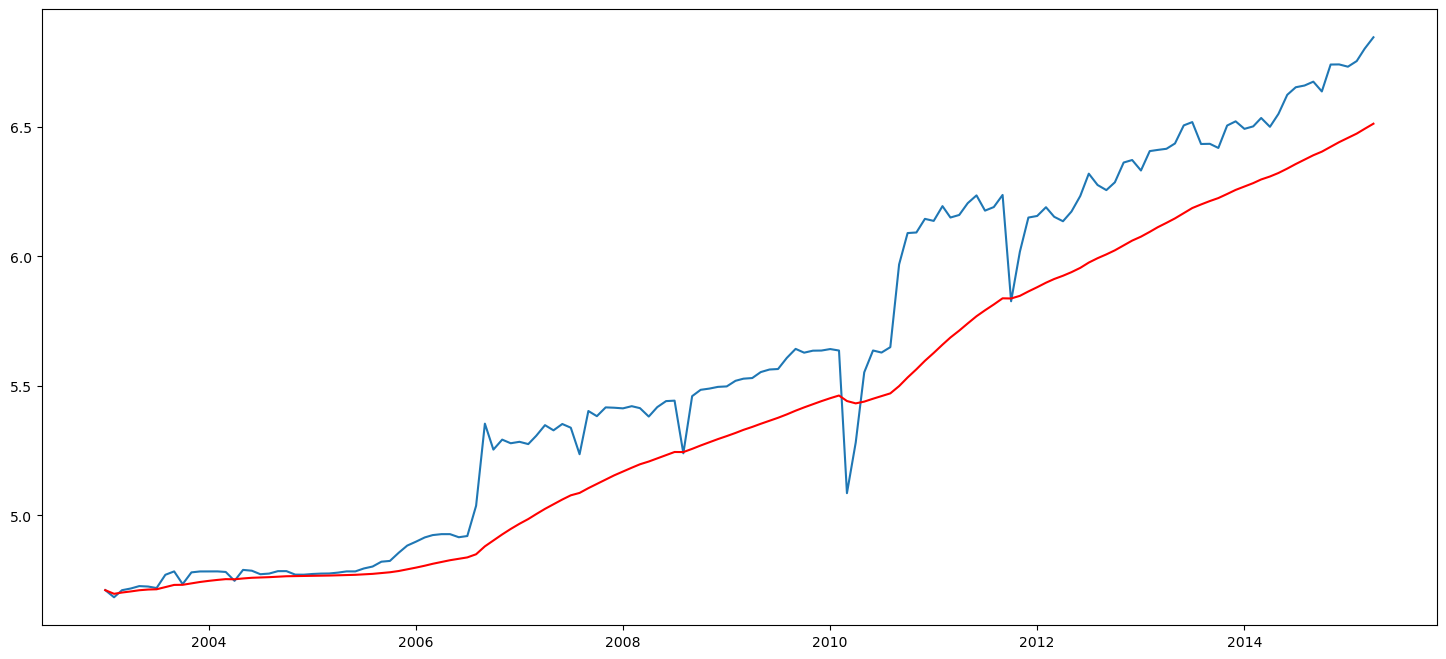

In [198]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

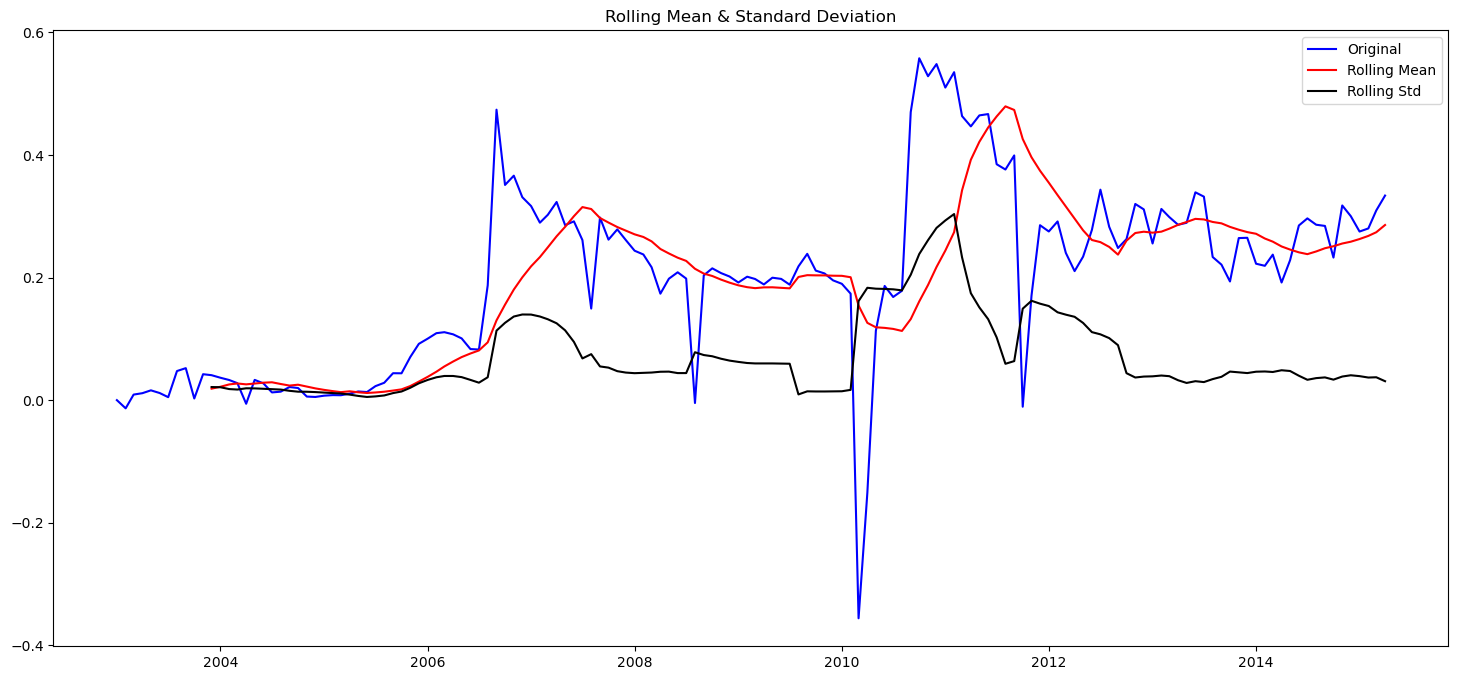

Results of Dickey-Fuller Test:
Test Statistic                  -2.678807
p-value                          0.077778
#Lags Used                       2.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


In [199]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

Differencing

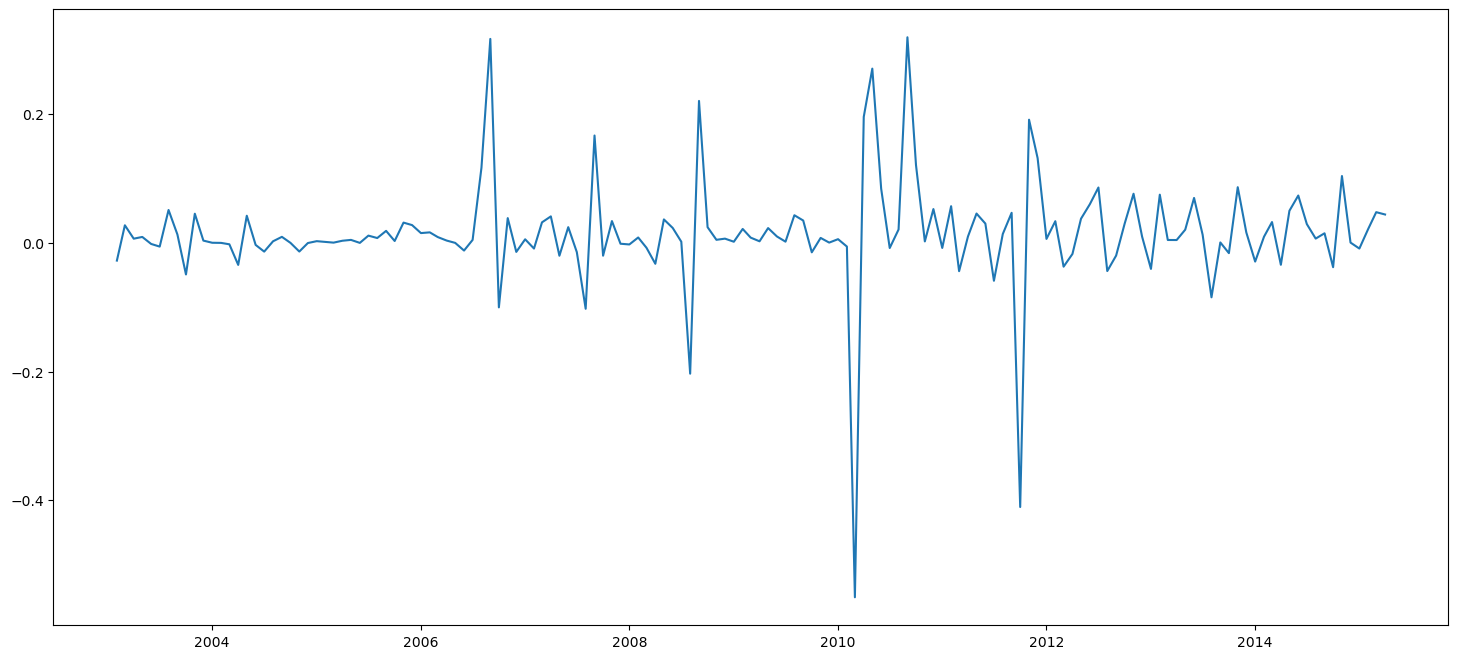

In [200]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

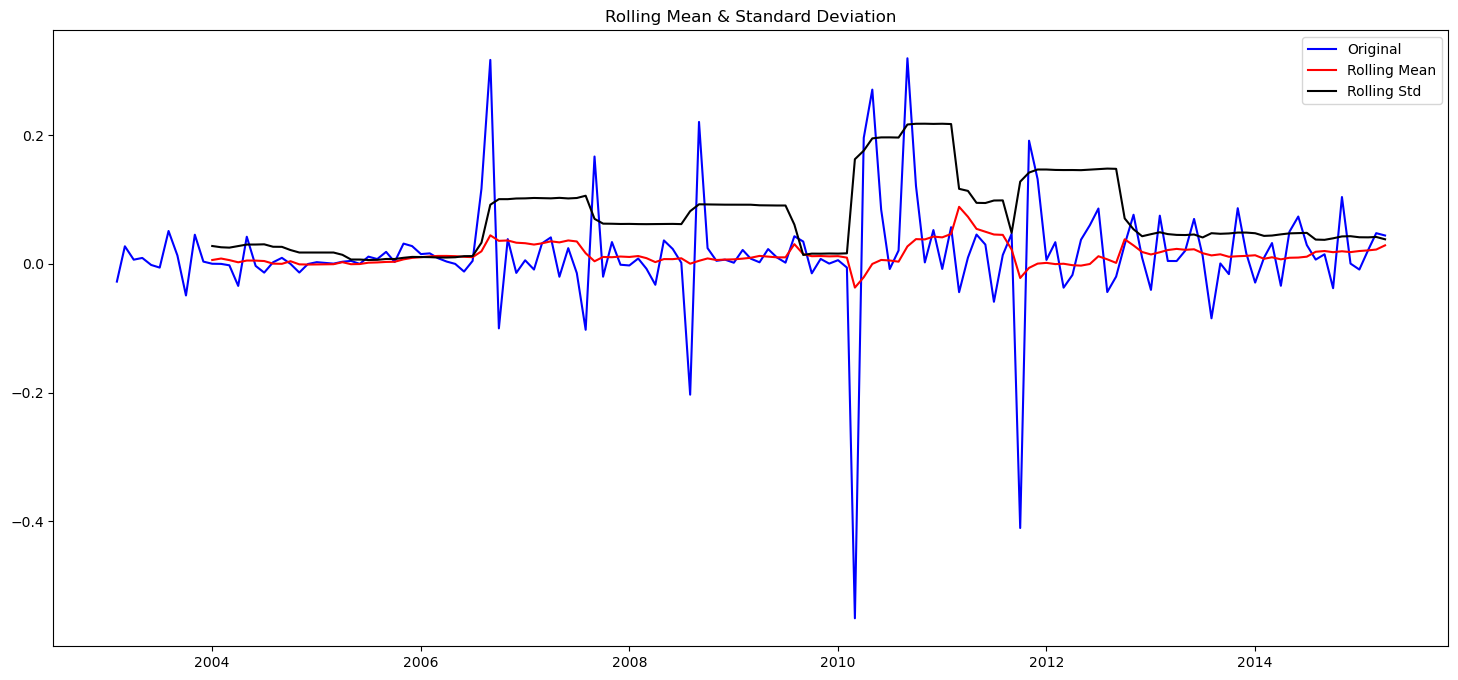

Results of Dickey-Fuller Test:
Test Statistic                -1.125339e+01
p-value                        1.690231e-20
#Lags Used                     1.000000e+00
Number of Observations Used    1.450000e+02
Critical Value (1%)           -3.476273e+00
Critical Value (5%)           -2.881688e+00
Critical Value (10%)          -2.577513e+00
dtype: float64


In [201]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Decomposing

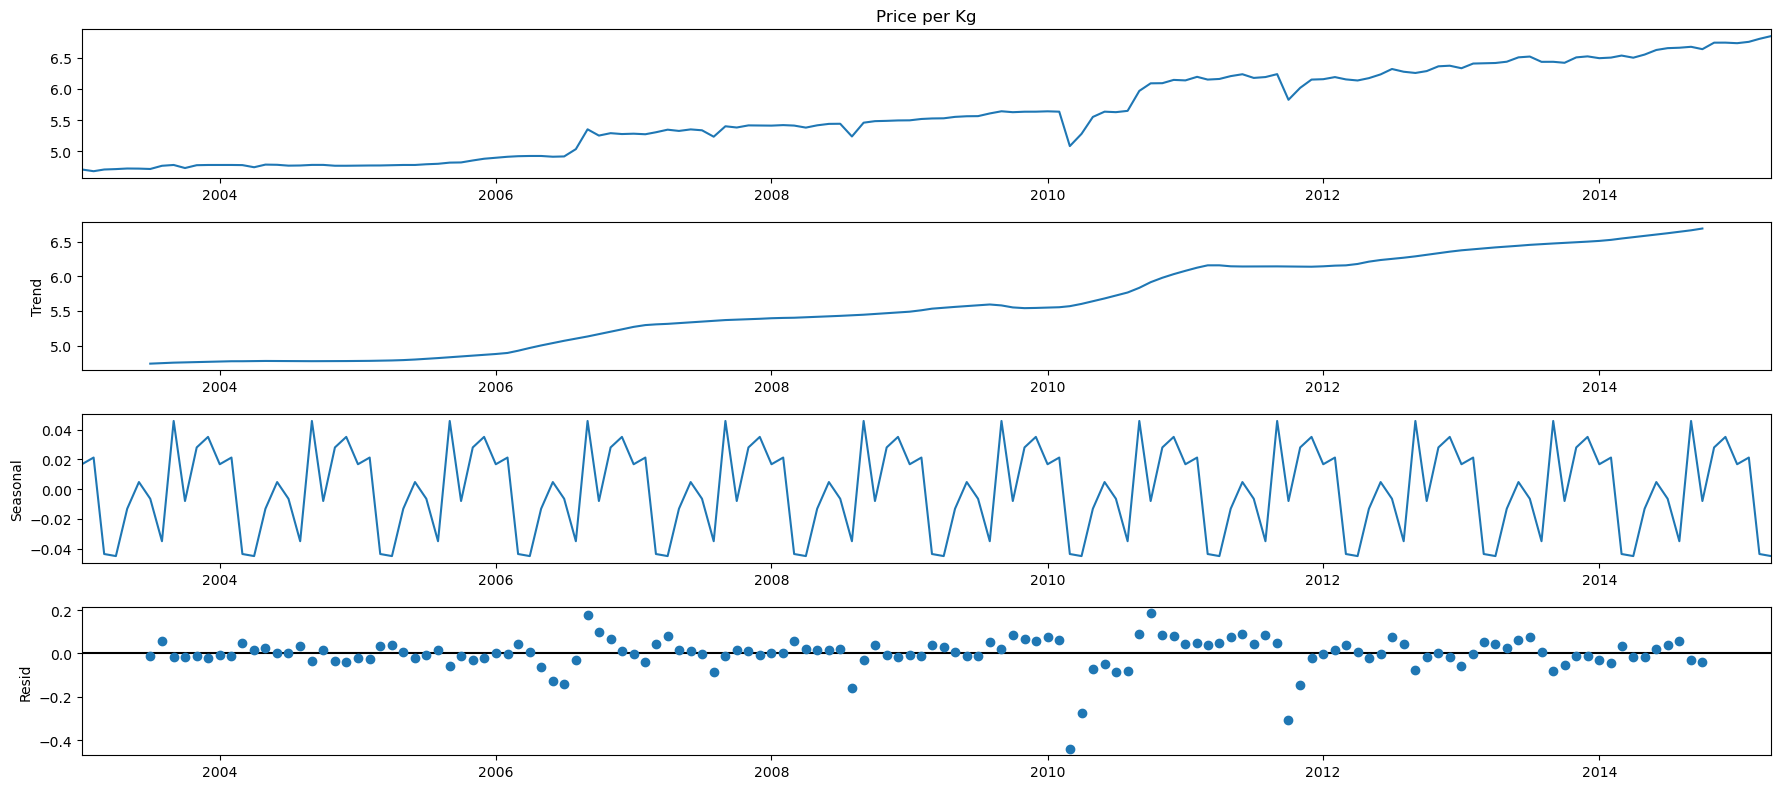

In [202]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

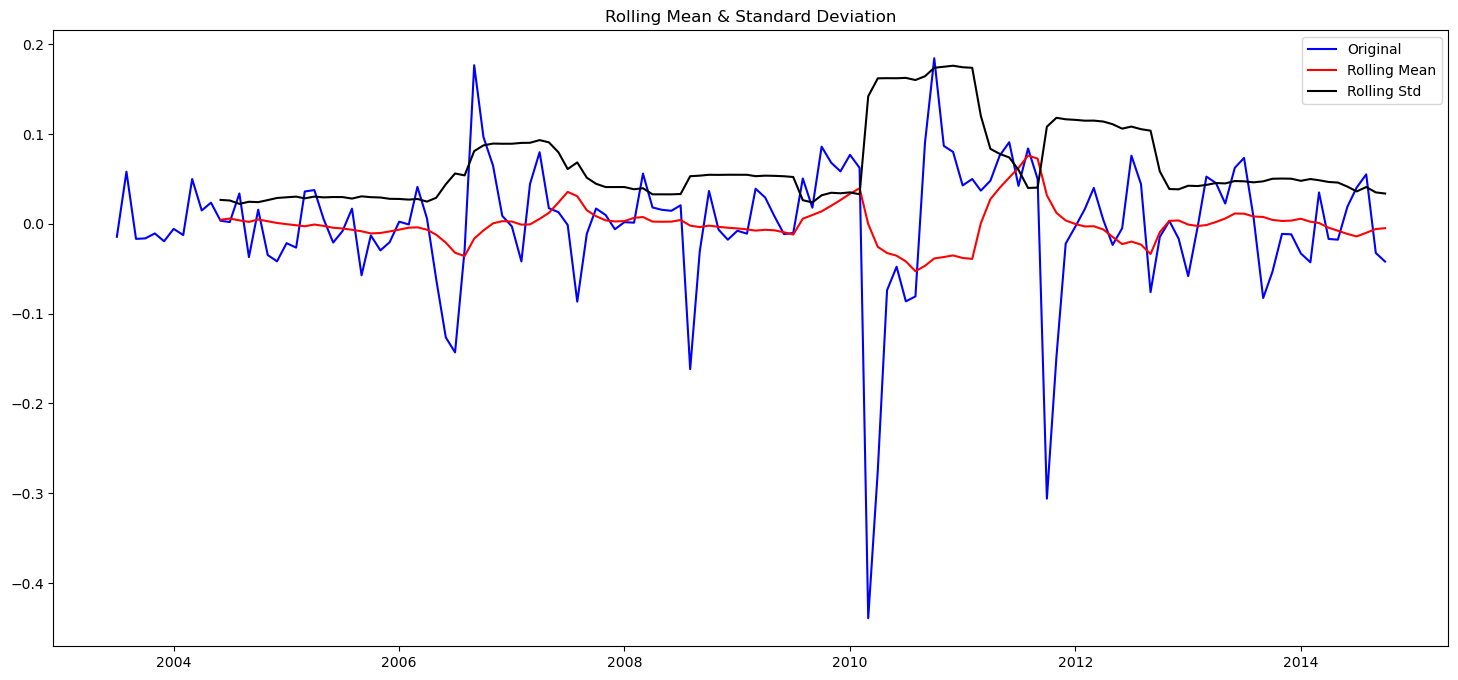

Results of Dickey-Fuller Test:
Test Statistic                -7.747462e+00
p-value                        1.022909e-11
#Lags Used                     1.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [203]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value.

So this TS is very close to stationary.


Time Series Forecasting with ARIMA 